Python: 3.7.4 (tags/v3.7.4:e09359112e, Jul  8 2019, 20:34:20) [MSC v.1916 64 bit (AMD64)]

|모듈|버젼|
|----|----|
|pandas|0.25.1|
|numpy|1.18.5|
|sklearn|0.21.3|
|scipy|1.5.2|
|mlxtend|0.15.0.0|
|statsmodels|0.11.1|
|imblearn|0.5.0|
|xgboost|0.80|

In [1]:
import pandas as pd
import numpy as np
import sklearn
import scipy 
import mlxtend
import statsmodels
import imblearn
import xgboost as xgb
import sys

print(sys.version)
for i in [pd, np, sklearn, scipy, mlxtend, statsmodels, imblearn, xgb]:
    print(i.__name__,  i.__version__)

3.7.4 (tags/v3.7.4:e09359112e, Jul  8 2019, 20:34:20) [MSC v.1916 64 bit (AMD64)]
pandas 0.25.1
numpy 1.18.5
sklearn 0.21.3
scipy 1.5.2
mlxtend 0.15.0.0
statsmodels 0.11.1
imblearn 0.5.0
xgboost 0.80


## 문제 8번, Kaggle형

**(EMP_TRAIN, EMP_TEST, SALARY_TRAIN, SALARY_TEST 사용)**

문제 5번에서는 근로자의 월 급여(MonthlySalary)를 예측하는 모델을 만들었습니다. 

본 문제에서는 월 급여(MonthlySalary)를 예측하는, 최고의 성능을 내는 회귀(regression) 모델을 자유롭게 구현합니다. 

문제 5번에서 사용한 예측 모델과 다른 종류의 모델을 사용하거나, 

다양한 파라미터의 튜닝, feature engineering 등 다양한 시도를 통해 더 높은 정확도를 보이는 모델을 개발합니다.

  문제 5번과 동일하게 EMP_TRAIN, SALARY_TRAIN 데이터셋을 모델 학습에 활용하시오. 
    
  EMP_TEST의 후반 400개 행에 대응하는 SALARY_TEST의 월 급여(MonthlySalary) 칼럼 값은 모두 0으로 기입되어 있습니다(알려지지 않음). 
  
  이 400개 행에 대한 월 급여(MonthlySalary)를 예측하여 제출하시오.
  
가능한 높은 성능을 가진 예측 모델을 개발하는 것이 목표이며, 평가 기준은 MAPE(Mean absolute percentage error) 입니다. 

$MAPE=\frac{1}{n}\sum_{i=1}^{n}|\frac{(actual_i-predicted_i)}{actual_i}| × 100 $


테스트 데이터인 EMP_TEST, SALARY_TEST의 900개 행 중, 처음 500개 행을 활용하여 모델을 평가하고, 이를 바탕으로 모델을 개선하시오. 

참고로 높은 성능을 가지는 회귀 모델을 만들기 위해서는, 적절한 data reduction 및 파라미터 튜닝이 필요합니다.

**제출 ①** - 예측한 레이블이 담긴 answer8.csv 파일 

  SALARY_TEST에서 501~900번째 행에 대한 MonthlySalary 칼럼 예측 값(Double or float type의 값). 
  반드시 다음 양식에 따라 제출해야 합니다. 
 
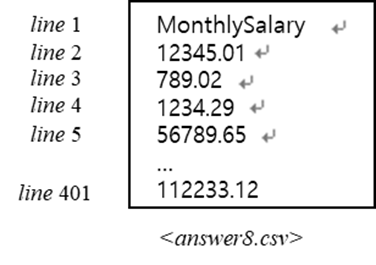
 
  즉, csv 파일의 첫번째 line에는 스키마 정보(예측 컬럼 값 이름인 “MonthlySalary”)를 기록하며, 

  실제 값은 두번째 line 부터 401번째 line에 있어야 합니다. (참고: 사용하는 예측모델에 따라 MonthlySalary 값은 정수 또는 실수로 나올 수 있으며, 어느 것이든 무방함).

  제출한 예측 값을 실제 정답과 비교하여 MAPE에 따라 평가할 것입니다

**제출 ②** – answer8 소스코드 

	Python 모델(answer8.py, answer8.ipynb)


In [2]:
# emp_train과 emp_test를 만들기 위한 데이터셋을 가져옵니다.
df_pers_train = pd.read_csv('data/prof2102_2_personnel_train.csv', index_col='EmpID')
df_pers_test = pd.read_csv('data/prof2102_2_personnel_test.csv', index_col='EmpID')
df_work = pd.read_csv('data/prof2102_2_work_record.csv', index_col='EmpID')

In [3]:
# emp_train, emp_test 를 만듭니다.
df_emp_p2 = df_work.fillna(0).mean(axis=1).rename('WorkMean')
df_emp_train = df_pers_train.join(df_emp_p2, on='EmpID').sort_values('EmpID')
df_emp_test = df_pers_test.join(df_emp_p2, on='EmpID').sort_values('EmpID')

In [4]:
# target 변수가 들어 있는 데이터프레임을 불러옵니다.
df_salary_train = pd.read_csv('data/prof2102_2_salary_train.csv', index_col='EmpID')
df_salary_test = pd.read_csv('data/prof2102_2_salary_test.csv', index_col='EmpID')

In [5]:
# Train과 Test을 만듭니다.
df_train = pd.concat([df_emp_train, df_salary_train['MonthlySalary']], axis=1)
df_test_org = pd.concat([df_emp_test, df_salary_test['MonthlySalary']], axis=1)

In [6]:
# Test셋에서 포함된 검증셋과
df_valid = df_test_org.iloc[:500]
# 제출용 실제 테스트셋을 분리합니다
df_test = df_test_org.iloc[500:]

In [7]:
df_train.head()

,Department,DistanceFromHome,Education,Gender,JobLevel,JobRole,MaritalStatus,PercentSalaryHike,StockOptionLevel,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,WorkMean,MonthlySalary
EmpID,,,,,,,,,,,,,,
1,Sales,6,College,Female,1,Healthcare Representative,Married,11,0,1,0,0,412.232558,131160
2,Research & Development,10,Below college,Female,1,Research Scientist,Single,23,1,5,1,4,431.593023,41890
3,Research & Development,17,Master,Male,4,Sales Executive,Married,15,3,5,0,3,412.395349,193280
4,Research & Development,2,Doctor,Male,3,Human Resources,Married,11,3,8,7,5,419.302326,83210
5,Research & Development,10,Below college,Male,1,Sales Executive,Single,12,2,6,0,4,468.325581,23420


In [8]:
df_valid.head()

,Department,DistanceFromHome,Education,Gender,JobLevel,JobRole,MaritalStatus,PercentSalaryHike,StockOptionLevel,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,WorkMean,MonthlySalary
EmpID,,,,,,,,,,,,,,
3501,Research & Development,7,Bachelor,Male,1,Sales Executive,Married,14,3,2,2,2,366.674419,52580
3502,Sales,2,Master,Male,1,Sales Executive,Married,11,0,5,0,4,433.953488,93550
3503,Research & Development,9,College,Female,1,Manufacturing Director,Divorced,13,1,5,0,2,380.337209,104960
3504,Sales,2,College,Female,1,Sales Executive,Married,23,1,9,2,3,394.895349,63800
3505,Sales,9,Below college,Male,2,Sales Executive,Single,13,1,3,0,2,460.976744,26570


In [9]:
df_test.head()

,Department,DistanceFromHome,Education,Gender,JobLevel,JobRole,MaritalStatus,PercentSalaryHike,StockOptionLevel,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,WorkMean,MonthlySalary
EmpID,,,,,,,,,,,,,,
4001,Research & Development,6,College,Male,1,Human Resources,Married,11,0,11,3,10,440.162791,0
4002,Sales,9,Master,Male,4,Sales Executive,Single,13,0,0,0,0,435.023256,0
4003,Research & Development,11,Bachelor,Male,1,Manager,Married,18,0,6,3,3,363.302326,0
4004,Sales,2,College,Female,5,Manager,Single,14,1,2,2,0,339.337209,0
4005,Human Resources,1,Bachelor,Female,1,Laboratory Technician,Divorced,21,0,9,4,7,410.709302,0


In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler


X_cat = ['Department', 'Education', 'Gender', 'JobRole', 'MaritalStatus']
X_num = [i for i in df_train.columns if i not in X_cat and i != 'MonthlySalary']

def mape(y, y_hat):
    return np.mean(np.abs((y - y_hat) / y))

# 모델을 검증하는 함수입니다.
# Model Instance와 입력변수명을 받아
# Train/Test score를 구하여 반환합니다.
def evaluate(reg, X):
    reg.fit(df_train[X], df_train['MonthlySalary'])
    mape_train = mape(df_train['MonthlySalary'], reg.predict(df_train[X]))
    mape_test = mape(df_valid['MonthlySalary'], reg.predict(df_valid[X]))
    return mape_train, mape_test

# 제출 파을 만듭니다.
def answer(reg, X):
    # valid 셋까지 합쳐 Train을 만들 수 있겠지만
    # 문제에 요건 상에서는 Train셋 만을 활용하라는 점에서 valid를 포함시키지 않았습니다.
    reg.fit(df_train[X], df_train['MonthlySalary'])
    # Test셋에 대한 예측 결과를 DataFrame으로 만듭니다.
    df_ans = pd.DataFrame(
        reg.predict(df_test[X]),
        columns=['MonthlySalary']
    )
    # DataFrame 생성시 Index를 설정하지 않으면 sequence Index가 기본적으로 생성됩니다. 
    # index=None을 지정하여, 이 Index가 출력파일에 포함되지 않도록합니다.
    df_ans.to_csv('answer8.csv', index=None)
    return df_ans

df_solution = pd.read_csv('data/kaggle_answer.csv')

In [11]:
# Baseline 모델입니다. 문제 5번을 따라갑니다.
# 일단 Baseline 모델을 만들고 출력파일을 만듭니다.
from sklearn.ensemble import RandomForestRegressor
ct = ColumnTransformer([
    ('ohe', OneHotEncoder(), X_cat),
    ('pt', 'passthrough', X_num),
])

X_rf = X_cat + X_num
reg_rf = make_pipeline(
    ct, 
    RandomForestRegressor(
        n_estimators = 10,
        random_state = 42
    )
)
evaluate(reg_rf, X_rf)

(0.13930247648096353, 0.2510263036951873)

In [12]:
# Baseline Answer

df_ans_baseline = answer(reg_rf, X_rf)

In [13]:
# Baseline의 채점 결과입니다. 
mape(df_solution['MonthlySalary'], df_ans_baseline['MonthlySalary'])

0.2591819663054663

In [14]:
# 두 번째 모델 Train의 성능을 높혀 봅니다.
# Evaluation도 높아집니다.
ct = ColumnTransformer([
    ('ohe', OneHotEncoder(), X_cat),
    ('pt', 'passthrough', X_num),
])

X_rf2 = X_cat + X_num
reg_rf2 = make_pipeline(
    ct, 
    RandomForestRegressor(
        n_estimators = 1,
        random_state = 42,
        bootstrap=False
    )
)
evaluate(reg_rf2, X_rf2)

(0.0, 0.10047910449410788)

In [15]:
# 다른 방법을 써봅니다.
# Train에 대해 확실히 100% 성능을 낼 수 있는 KNN을 사용해봅니다.

from sklearn.neighbors import KNeighborsRegressor
ct = ColumnTransformer([
    ('ohe', OneHotEncoder(), X_cat),
    ('std', StandardScaler(), X_num), # Standard Scaling을 적용합니다.
])

X_knn = X_cat + X_num
reg_knn = make_pipeline(
    ct, 
    KNeighborsRegressor(
        n_neighbors=1
    )
)
evaluate(reg_knn, X_knn)

(0.0, 0.0)

In [16]:
# 최종제출 모델로 판단합니다. 

df_ans_knn = answer(reg_knn, X_knn)

In [17]:
# 최종 모델에 대한 채점 결과입니다.

mape(df_solution['MonthlySalary'], df_ans_knn['MonthlySalary'])

0.0